# GG274 Homework 11: Making a Map with GeoPandas 

## Logistics

**Due date**: The homework is due 23:59 on Tuesday, April 1.

You will submit your work on [MarkUs](https://markus-ds.teach.cs.toronto.edu).
To submit your work:

1. Download this file (`Homework_11.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw11** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)
All homeworks will take place in a Jupyter notebook (like this one). When you are done, you will download this notebook and submit it to MarkUs.


## Introduction

In this homework you will create a map of 2020 GDP (per capita, PPP in constant 2017 dollars) in each country around the world. First you'll need to clean up the GDP data which has GDP values for multiple years. Then you'll need to create a map of 2020 GDP classifying the data using 5 quantiles (e.g., quintiles).

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import xlrd

## Step 1 - Read the GDP data into a `pandas` `DataFrame`

a)  The data is stored in `gdp-per-capita-worldbank.csv` .

Use the `pandas` function `read_csv` to read the data into a `pandas` `DataFrame` named `gdp_data_df`. 


In [2]:
# Write your code below

gdp_data_df = pd.read_csv('gdp-per-capita-worldbank.csv')

b) Create a boolean `Series` called `gdp_2020` that is `True` for the rows that represent GDP per capita *in 2020*, and `False` otherwise.

In [3]:
gdp_2020 = gdp_data_df['Year'] == 2020

c) Use `gdp_data_df` to create another `DataFrame` called `gdp_2020_df` that has three columns: `'Entity', 'Code', and 'GDP per capita'` (in that order) and only has rows containing GDP data from 2020.

In [4]:
# Write your code below
important_cols = ['Entity', 'Code', 'GDP per capita']
gdp_2020_df = gdp_data_df.copy()

gdp_2020_df = gdp_2020_df[gdp_2020]
gdp_2020_df = gdp_2020_df[important_cols]


## Step 2 - Bring in the world countries spatial data using `geopandas` as a `GeoDataFrame`.

a) Import the `countries.geojson` file using `geopandas` `GeoDataFrame.from_file` function and name the new `GeoDataFrame` as `countries_gdf`.

In [5]:
# Write your code below
countries_gdf = gpd.GeoDataFrame.from_file('countries.geojson')


Modify `countries_gdf` by renaming column `ADMIN` to `Entity` and column `ISO_A3` to `Code` using a dictionary.
Do this "in place" so that the original `GeoDataFrame` is modified, instead of creating a new `GeoDataFrame`.

In [6]:
# important_cols = countries_gdf.columns[[0,1,2]]
# colnames = {important_cols[0]: 'Entity',
#            important_cols[1]: 'Code',
#            important_cols[2]: 'geometry'}
colnames = {
    'ADMIN': 'Entity',
    'ISO_A3': 'Code'
}
countries_gdf.rename(columns=colnames, inplace=True)


b) Create a basic figure of the new `GeoDataFrame` as a map using the `plot` function. Save the plot to a variable called `countries_gdf_plot`.

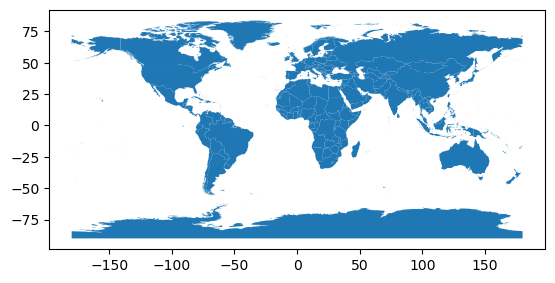

In [7]:
# Write your code below
countries_gdf_plot = countries_gdf.plot()

## Step 3 - Join the spatial data with the GDP data

a) In this step you will merge the GDP data with the spatial countries data.

Use the `merge` function to do a **left join** (i.e., `how='left'`) of the 2020 GDP `DataFrame` with the countries `GeoDataFrame`, using the column `Code` for the `on` argument. 

Name the joined data `countries_gdp_gdf`.

In [7]:
# Write your code below

countries_gdp_gdf = countries_gdf.merge(gdp_2020_df, on='Code', how='left')

b) Why are we using a left join? Consider Aruba as an example. *Hint*: are the data consistently complete for all countries?

You may want to refer to the document of the [merge function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge).

*Write your answer in this cell.*

**Answer**: not all countries have GDP reported for 2020. Countries like Aruba have GDP data for most years, but not 2020. The left join allows us to keep countries in the map, but that don't have data. 

## Step 4 - Create a map that displays the 2020 GDP of world countries

In the below cell, create a map that displays `GDP per capita` in 5 quantiles. In the `plot` function use `cmap = 'YlOrRd'`, `edgecolor='black'`, `ax=axes`, `scheme = 'quantiles'`, `k = 5`, and `legend=True`. 

In addition, add the following two dictionaries in the `plot` function's arguments:

`missing_kwds={
        'color': 'lightgrey',
        'edgecolor': 'black',
        'label': 'Missing values'}`
        
`legend_kwds={
        'loc': 3, 
        'title': 'GDP per capita',
        'title_fontsize': 23,
        'fontsize': 15}`

Save the map to `countries_gdp_gdf_plot`. 


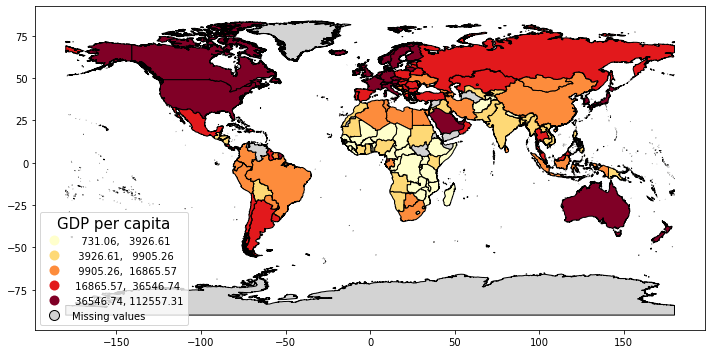

In [8]:
# Leave this code here: generate our figure/axes and set fig size
fig, axes = plt.subplots(1, 1, figsize = (12,12))

# Write your code below

countries_gdp_gdf_plot = countries_gdp_gdf.plot(
    column='GDP per capita',
    scheme='quantiles',
    k=5,
    cmap='YlOrRd', edgecolor='black', ax=axes, legend=True,
    missing_kwds={
        'color': 'lightgrey',
        'edgecolor': 'black',
        'label': 'Missing values'},
    legend_kwds={
        'loc': 3, 
        'title': 'GDP per capita',
        'title_fontsize': 15,
        'fontsize': 10
    }
)

## Step 5 - Why do we use the `missing kwds` dictionary? 

After looking at the code, write a sentence or two that interprets why we included `missing_kwds` in our plot function. Try rerunning the above code without the dictionary to better understand what it does.

*Write your answer in this cell.*

**Answer**: We use that code because it allows us to display the geometries of countries and regions that do not have 2020 GDP data. 